# Candlestick Kicking bull/bear determined by the longer marubozu

https://patternswizard.com/kicking-candlestick-pattern/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import talib

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'BABA'
start = '2012-01-01'
end = '2021-10-22'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-19,92.699997,99.699997,89.949997,93.889999,93.889999,271879400
2014-09-22,92.699997,92.949997,89.500000,89.889999,89.889999,66657800
2014-09-23,88.940002,90.480003,86.620003,87.169998,87.169998,39009800
2014-09-24,88.470001,90.570000,87.220001,90.570000,90.570000,32088000
2014-09-25,91.089996,91.500000,88.500000,88.919998,88.919998,28598000


## Candlestick with Kicking bull/bear determined by the longer marubozu

In [3]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,VolumePositive
0,735495.0,92.699997,99.699997,89.949997,93.889999,93.889999,271879400,True
1,735498.0,92.699997,92.949997,89.500000,89.889999,89.889999,66657800,False
2,735499.0,88.940002,90.480003,86.620003,87.169998,87.169998,39009800,False
3,735500.0,88.470001,90.570000,87.220001,90.570000,90.570000,32088000,True
4,735501.0,91.089996,91.500000,88.500000,88.919998,88.919998,28598000,False


Text(0, 0.5, 'Price')

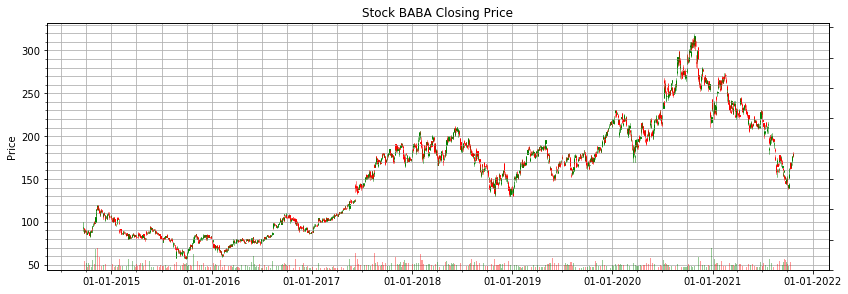

In [4]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

In [5]:
kicking_marubozu = talib.CDLKICKINGBYLENGTH(df['Open'], df['High'], df['Low'], df['Close'])

kicking_marubozu = kicking_marubozu[kicking_marubozu != 0]

In [6]:
df['kicking_marubozu'] = talib.CDLKICKINGBYLENGTH(df['Open'], df['High'], df['Low'], df['Close'])

In [7]:
df.loc[df['kicking_marubozu'] !=0]

,Open,High,Low,Close,Adj Close,Volume,kicking_marubozu
Date,,,,,,,


In [8]:
df['Adj Close'].loc[df['kicking_marubozu'] !=0]

Series([], Name: Adj Close, dtype: float64)

In [9]:
df['Adj Close'].loc[df['kicking_marubozu'] !=0].index

DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)

In [10]:
kicking_marubozu

Series([], dtype: int32)

In [11]:
kicking_marubozu.index

DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)

In [12]:
df

,Open,High,Low,Close,Adj Close,Volume,kicking_marubozu
Date,,,,,,,
2014-09-19,92.699997,99.699997,89.949997,93.889999,93.889999,271879400,0
2014-09-22,92.699997,92.949997,89.500000,89.889999,89.889999,66657800,0
2014-09-23,88.940002,90.480003,86.620003,87.169998,87.169998,39009800,0
2014-09-24,88.470001,90.570000,87.220001,90.570000,90.570000,32088000,0
2014-09-25,91.089996,91.500000,88.500000,88.919998,88.919998,28598000,0
...,...,...,...,...,...,...,...
2021-10-15,166.990005,169.800003,165.434998,168.000000,168.000000,20747300,0
2021-10-18,166.580002,169.250000,166.580002,166.820007,166.820007,18945900,0
2021-10-19,170.600006,177.440002,170.449997,177.000000,177.000000,33538900,0


Text(0, 0.5, 'Price')

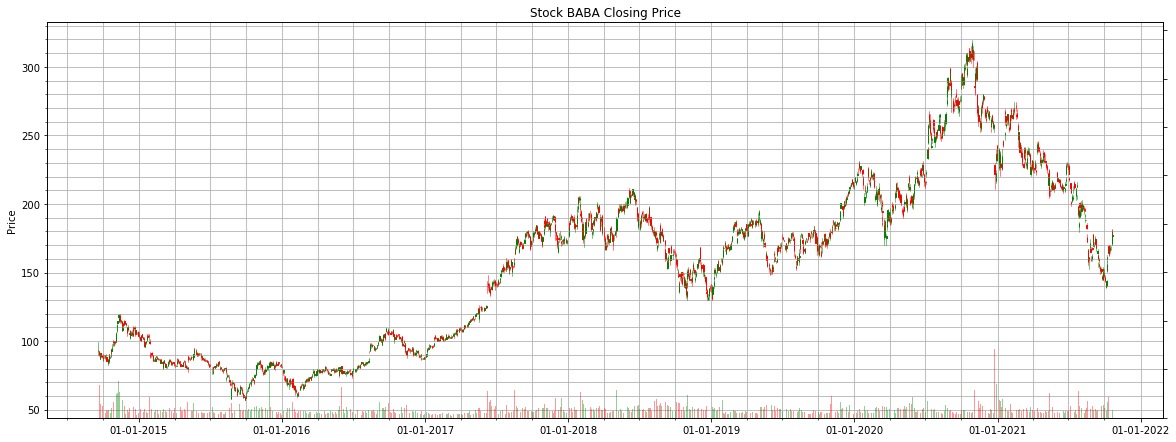

In [13]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['kicking_marubozu'] !=0].index, df['Adj Close'].loc[df['kicking_marubozu'] !=0],
                'pk', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=10.0) 
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

## Plot Certain dates

In [14]:
df = df['2021-08-01':'2021-09-01']
dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,kicking_marubozu,VolumePositive
0,738004.0,196.270004,202.070007,196.250000,200.089996,200.089996,17889200,0,True
1,738005.0,195.009995,197.440002,192.000000,197.380005,197.380005,20115900,0,True
2,738006.0,197.490005,203.274994,196.910004,200.710007,200.710007,22327300,0,True
3,738007.0,199.270004,200.289993,197.639999,199.279999,199.279999,9881400,0,True
4,738008.0,199.250000,199.320007,195.679993,196.389999,196.389999,11961300,0,False


Text(0, 0.5, 'Price')

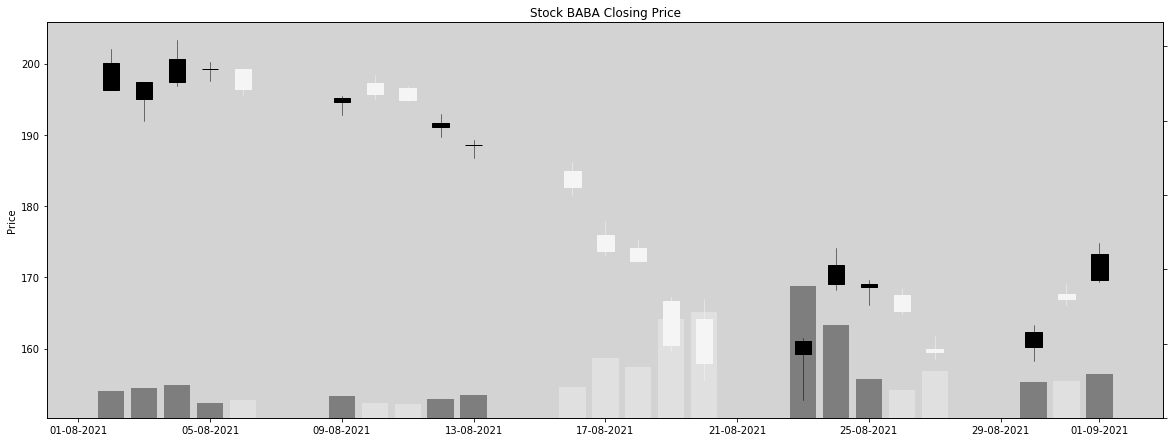

In [15]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
ax.set_facecolor('lightgrey')
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='black', colordown='whitesmoke', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['kicking_marubozu'] !=0].index, df['Adj Close'].loc[df['kicking_marubozu'] !=0],
                'ok', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=25.0) 
colors = dfc.VolumePositive.map({True: 'black', False: 'whitesmoke'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

# Highlight Candlestick

Text(0, 0.5, 'Price')

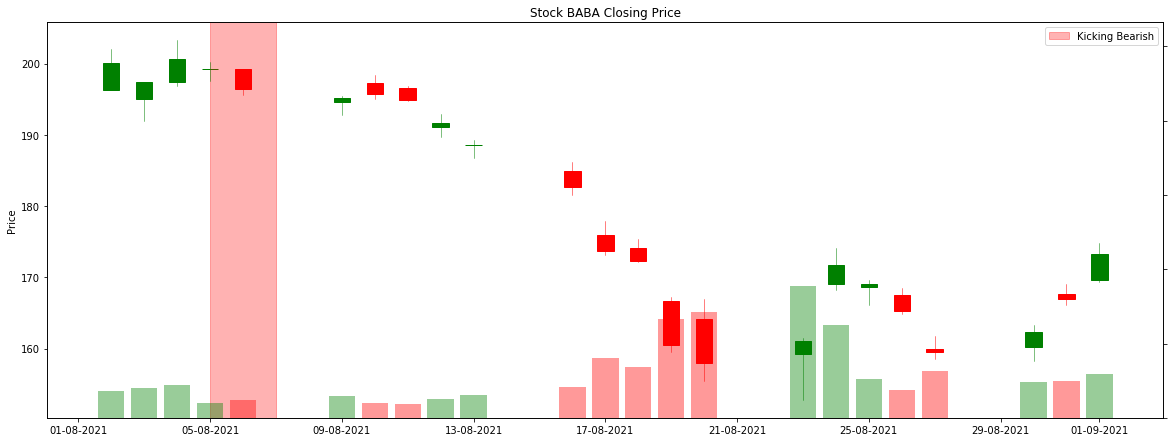

In [16]:
from matplotlib.dates import date2num
from datetime import datetime

fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.axvspan(date2num(datetime(2021,8,5)), date2num(datetime(2021,8,7)), 
           label="Kicking Bearish",color="red", alpha=0.3)
ax.legend()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')